In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
tmp_dir = '/ix/djishnu/shared/djishnu_kor11/training_data_2025'

adata_1 = sc.read_h5ad(f'{tmp_dir}/mouse_lymph1_ctrl_visiumHD.h5ad')
adata_2 = sc.read_h5ad(f'{tmp_dir}/mouse_lymph2_ctrl_visiumHD.h5ad')
adata_3 = sc.read_h5ad(f'{tmp_dir}/mouse_lymph3_ctrl_visiumHD.h5ad')

adata_1, adata_2, adata_3

(AnnData object with n_obs × n_vars = 48988 × 3204
     obs: 'cell_type', 'cell_type_int', 'sample'
     var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'cell_type_colors', 'hvg', 'log1p'
     obsm: 'spatial', 'spatial_unscaled', 'tangram_ct_pred'
     layers: 'imputed_count', 'normalized_count', 'raw_count',
 AnnData object with n_obs × n_vars = 47031 × 3204
     obs: 'cell_type', 'cell_type_int', 'sample'
     var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'cell_type_colors', 'hvg', 'log1p'
     obsm: 'spatial', 'spatial_unscaled', 'tangram_ct_pred'
     layers: 'imputed_count', 'normalized_count', 'raw_count',
 AnnData object with n_obs × n_vars = 40524 × 3204
     obs: 'cell_type', 'cell_type_int', 'sample'
     var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'cell_type_colors', 'hvg', 'log1p'
     obsm: 'spatial', 'spatial_unscaled', 'tangram_ct_pred'
     layer

In [4]:
adata_sc = sc.concat(
    [adata_1, adata_2, adata_3], 
    join='outer', label='sample', 
    keys=['adata_1', 'adata_2', 'adata_3']
)
adata_sc

AnnData object with n_obs × n_vars = 136543 × 3204
    obs: 'cell_type', 'cell_type_int', 'sample'
    obsm: 'spatial', 'spatial_unscaled', 'tangram_ct_pred'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [ ]:
sc.tl.pca(adata_sc, svd_solver='arpack', layer='normalized_count')
sc.pp.neighbors(adata_sc, n_neighbors=15, use_rep='X_pca')

<Axes: title={'center': 'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

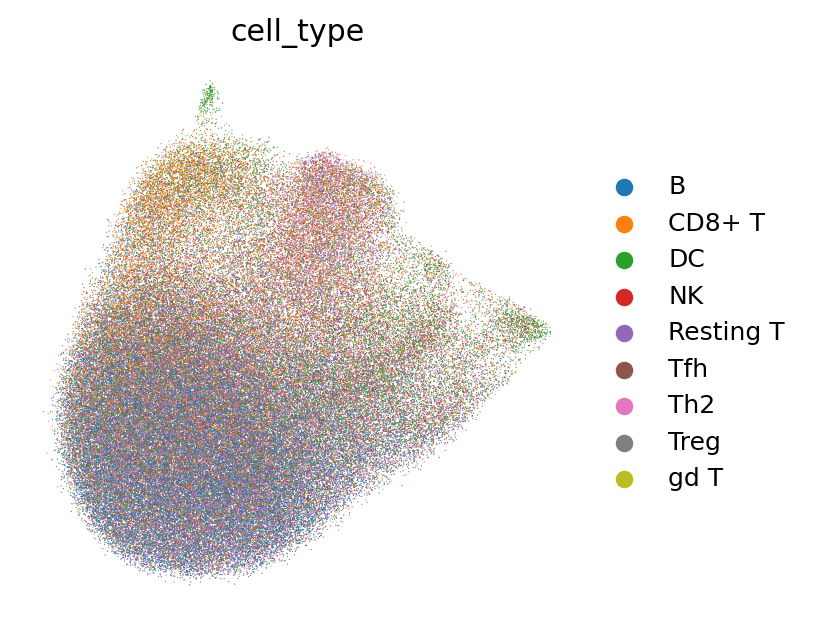

In [19]:
sc.tl.umap(adata_sc)
sc.pl.umap(adata_sc, color=['cell_type'], frameon=False, show=False)

In [20]:
import sys
sys.path.append('../../src')

In [21]:
import celloracle as co

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams['figure.dpi'] = 180

In [22]:
# check that imputed count is in adata layers
adata_sc

AnnData object with n_obs × n_vars = 136543 × 3204
    obs: 'cell_type', 'cell_type_int', 'sample'
    uns: 'pca', 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'spatial', 'spatial_unscaled', 'tangram_ct_pred', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'distances', 'connectivities'

In [23]:
oracle = co.Oracle()

adata_sc.X = adata_sc.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata_sc,
    cluster_column_name="cell_type",
    embedding_name="X_umap"
)

oracle.pcs = [True]
oracle.k_knn_imputation = 1
oracle.knn = 1

In [24]:
base_GRN = co.data.load_mouse_promoter_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

Loading prebuilt promoter base-GRN. Version: mm10_gimmemotifsv5_fpr2


In [25]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="cell_type", 
    alpha=10,
    verbose_level=2
)

  0%|          | 0/9 [00:00<?, ?it/s]

Inferring GRN for B...


  0%|          | 0/3083 [00:00<?, ?it/s]

 11%|█         | 1/9 [16:16<2:10:15, 976.88s/it]

Inferring GRN for CD8+ T...


  0%|          | 0/3083 [00:00<?, ?it/s]

 22%|██▏       | 2/9 [28:39<1:37:53, 839.10s/it]

Inferring GRN for DC...


  0%|          | 0/3083 [00:00<?, ?it/s]

 33%|███▎      | 3/9 [37:16<1:09:11, 691.89s/it]

Inferring GRN for NK...


  0%|          | 0/3083 [00:00<?, ?it/s]

 44%|████▍     | 4/9 [46:28<53:04, 636.93s/it]  

Inferring GRN for Resting T...


  0%|          | 0/3083 [00:00<?, ?it/s]

 56%|█████▌    | 5/9 [1:01:57<49:28, 742.17s/it]

Inferring GRN for Tfh...


  0%|          | 0/3083 [00:00<?, ?it/s]

 67%|██████▋   | 6/9 [1:11:30<34:13, 684.53s/it]

Inferring GRN for Th2...


  0%|          | 0/3083 [00:00<?, ?it/s]

 78%|███████▊  | 7/9 [1:15:59<18:17, 548.70s/it]

Inferring GRN for Treg...


  0%|          | 0/3083 [00:00<?, ?it/s]

 89%|████████▉ | 8/9 [1:20:41<07:43, 463.90s/it]

Inferring GRN for gd T...


  0%|          | 0/3083 [00:00<?, ?it/s]

100%|██████████| 9/9 [1:23:49<00:00, 558.79s/it]

CPU times: user 50min 26s, sys: 26.5 s, total: 50min 53s
Wall time: 1h 24min 16s


In [26]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(
    alpha=10, 
    use_cluster_specific_TFdict=True
)

  0%|          | 0/9 [00:00<?, ?it/s]

In [27]:
import pickle

with open('/ix/djishnu/shared/djishnu_kor11/training_data_2025/mouse_lymph_visiumHD_colinks.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

In [28]:
links.to_hdf5(file_path="/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph_visiumHD.celloracle.links")

In [29]:
oracle.to_hdf5("/ix/djishnu/shared/djishnu_kor11/co_objects/mouse_lymph_visiumHD.celloracle.oracle")